# K-Nearest Neighbour (KNN) Classification

In [35]:
# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('D:/university/ThirdYear/Seconed/Introduction to Machine Learning/Lab/5/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/university/ThirdYear/Seconed/Introduction to Machine Learning/Lab/5/archive.zip
D:/university/ThirdYear/Seconed/Introduction to Machine Learning/Lab/5/Confusion_matrix (1).ipynb
D:/university/ThirdYear/Seconed/Introduction to Machine Learning/Lab/5/k_nearest_neighbour.ipynb
D:/university/ThirdYear/Seconed/Introduction to Machine Learning/Lab/5/week_4.ipynb
D:/university/ThirdYear/Seconed/Introduction to Machine Learning/Lab/5/archive\column_2C_weka.csv
D:/university/ThirdYear/Seconed/Introduction to Machine Learning/Lab/5/archive\column_3C_weka.csv


In [49]:
data = pd.read_csv("D:/university/ThirdYear/Seconed/Introduction to Machine Learning/Lab/5/archive/column_2C_weka.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [50]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


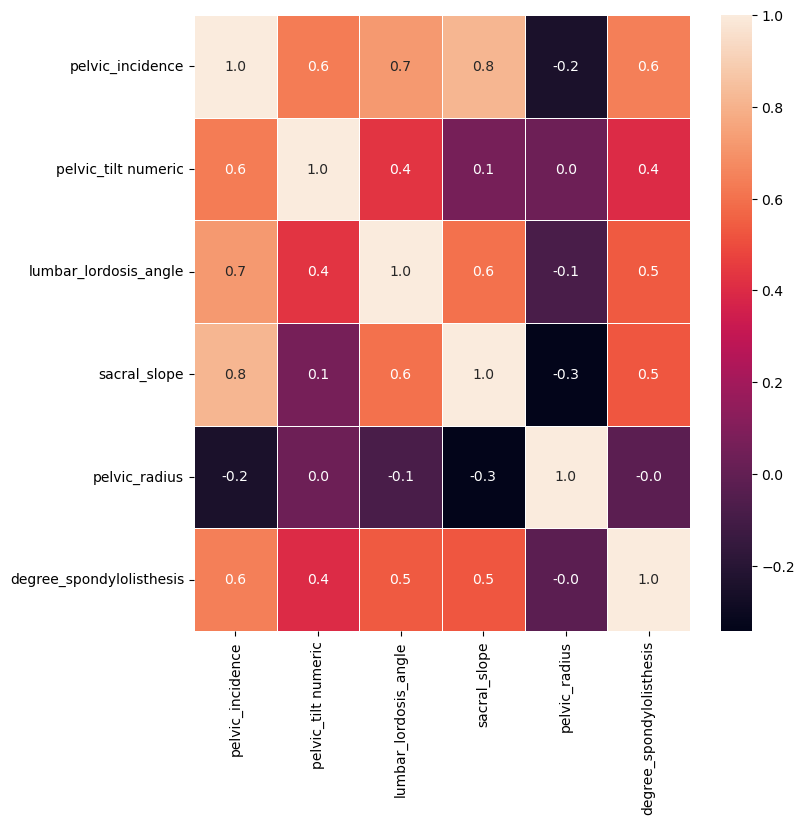

In [51]:
# visualization

f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, fmt = ".1f", ax =ax)
plt.xticks(rotation = 90)
plt.show()

In [52]:
A = data[data["class"] == "Abnormal"]
N = data[data["class"] == "Normal"]

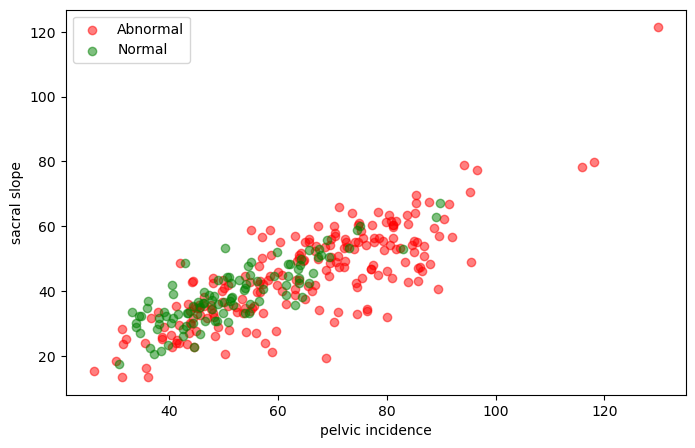

In [53]:
plt.figure(figsize = (8,5))
plt.scatter(A.pelvic_incidence, A.sacral_slope, color = "red", alpha = 0.5, label = "Abnormal")
plt.scatter(N.pelvic_incidence, N.sacral_slope, color = "green", alpha = 0.5, label = "Normal")
plt.xlabel("pelvic incidence")
plt.ylabel("sacral slope")
plt.legend()
plt.show()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [55]:
# abnormal = 1
# normal = 0
data["class"] = [1 if i == "Abnormal" else 0 for i in data["class"]]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [56]:
# We assigned the value y to the Class column.
y = data["class"].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
# we assign the remaining columns to the value x_data
x_data = data.drop(["class"], axis = 1)
x_data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [59]:
# Normalization 
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [60]:
# train test split from sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)
print(x_train.shape)
print(x_test.shape)

(217, 6)
(93, 6)


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.56      0.70      0.62        27
           1       0.86      0.77      0.82        66

    accuracy                           0.75        93
   macro avg       0.71      0.74      0.72        93
weighted avg       0.78      0.75      0.76        93



In [65]:
print(classification_report(y_test, y_pred_19))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69        27
           1       0.89      0.83      0.86        66

    accuracy                           0.81        93
   macro avg       0.77      0.79      0.77        93
weighted avg       0.82      0.81      0.81        93



C:\Users\nados\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nados\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

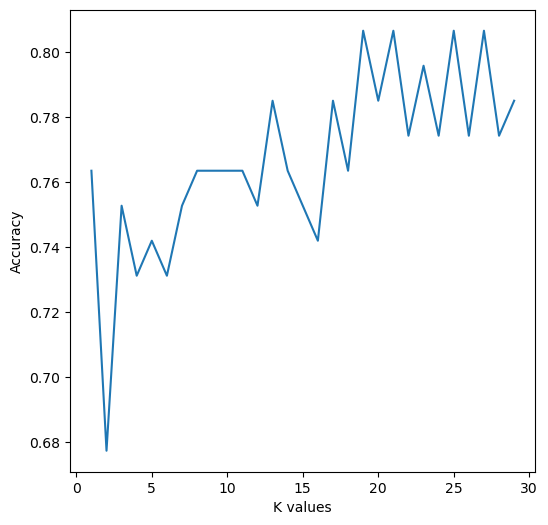

In [81]:
score_list = []
for i in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors= i)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
plt.figure(figsize = (6,6))
plt.plot(range(1,30), score_list)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("{} NN score: {} ".format(3,knn.score(x_test, y_test)))

3 NN score: 0.7526881720430108 


C:\Users\nados\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nados\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\nados\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\nados\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

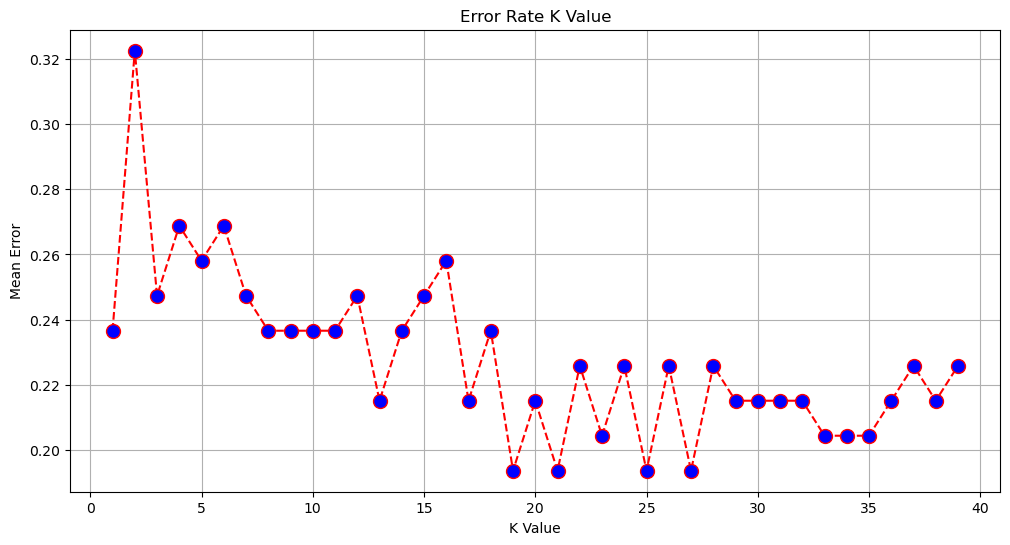

In [80]:
error = []
for i in range (1,40):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()
plt.show()

In [76]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_head)

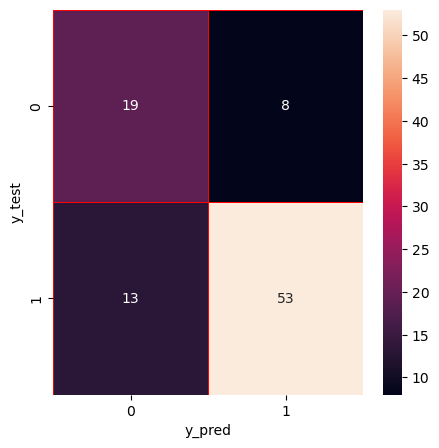

In [77]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm,annot=True,fmt= '.0f',linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()